# Monte Carlo simulation for computing $\pi$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
def compute_pi(nrep, ns):
    samples = 2.0 * (np.random.rand(nrep, 2, ns) - 0.5)
    dist = np.sqrt((samples**2).sum(axis=1))
    ratio = (dist <= 1.0).sum(axis=1)/ns
    pi_comp = 4 * ratio
    return pi_comp

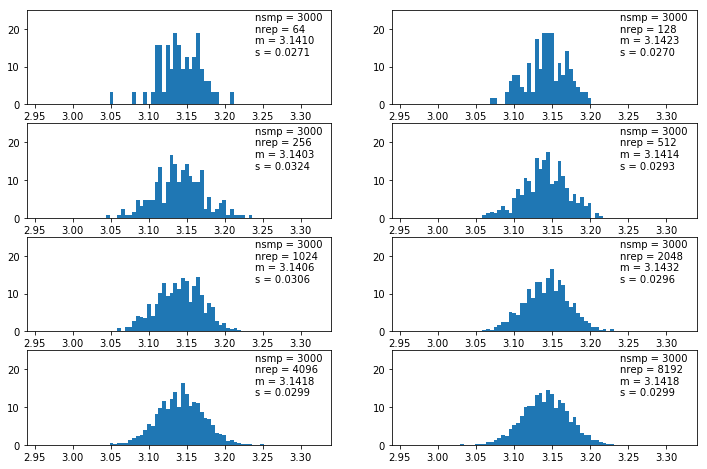

In [118]:
# simulation for various nreps
plt.rcParams['figure.figsize'] = (12.0, 8.0)
nsmp = 3000
nreps = np.power(2, np.arange(6, 14))
rng = (2.94, 3.34)
mus = np.zeros(nreps.shape[0])
sts = np.zeros(nreps.shape[0])
for i, nrep in enumerate(nreps):
    pi_comp = compute_pi(nrep, nsmp)
    mus[i] = pi_comp.mean()
    sts[i] = pi_comp.std()
    ax = plt.subplot(4, 2, i + 1)
    plt.hist(pi_comp, bins=81, range=rng, normed=True)
    ax.annotate('nsmp = {:d}\nnrep = {:d}\nm = {:1.4f}\ns = {:1.4f}'.\
              format(nsmp, nrep, mus[i], sts[i]), xy=(3.24, 13.))
    plt.xlim(rng)
    plt.ylim((0.0, 25.0))

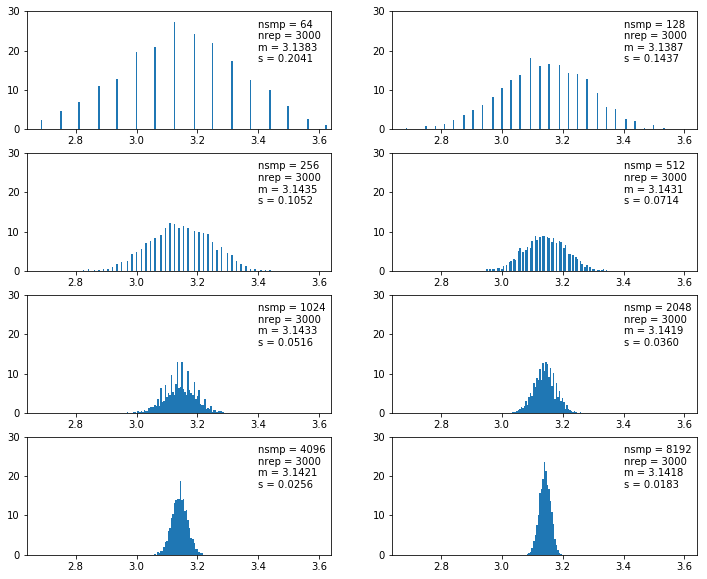

In [119]:
# simulation for various nsmps
plt.rcParams['figure.figsize'] = (12.0, 10.0)
nsmps = np.power(2, np.arange(6, 14))
nrep = 3000
rng = (2.64, 3.64)
mus = np.zeros(nreps.shape[0])
sts = np.zeros(nreps.shape[0])
for i, nsmp in enumerate(nsmps):
    pi_comp = compute_pi(nrep, nsmp)
    mus[i] = pi_comp.mean()
    sts[i] = pi_comp.std()
    ax = plt.subplot(4, 2, i + 1)
    plt.hist(pi_comp, bins=201, range=rng, normed=True)
    ax.annotate('nsmp = {:d}\nnrep = {:d}\nm = {:1.4f}\ns = {:1.4f}'.\
                format(nsmp, nrep, mus[i], sts[i]), xy=(3.4, 17.))
    plt.xlim(rng)
    plt.ylim((0.0, 30.0))

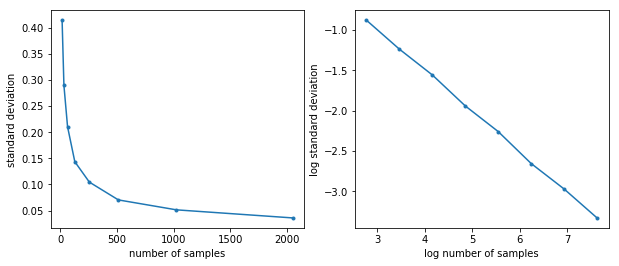

In [131]:
# simulation for various nsmps and nreps. plotting nsmps vs standard deviations.
plt.rcParams['figure.figsize'] = (10.0, 4.0)
nsmps = np.power(2, np.arange(4, 12))
nreps = np.power(2, np.arange(4, 12))
mus = np.zeros((nsmps.shape[0], nreps.shape[0]))
sts = np.zeros((nsmps.shape[0], nreps.shape[0]))
for i, nsmp in enumerate(nsmps):
    for j, nrep in enumerate(nreps):
        pi_comp = compute_pi(nrep, nsmp)
        mus[i,j] = pi_comp.mean()
        sts[i,j] = pi_comp.std()

plt.subplot(1, 2, 1)
plt.plot(nsmps, sts[:, -1], '.-')
plt.xlabel('number of samples')
plt.ylabel('standard deviation')
plt.subplot(1, 2, 2)
plt.plot(np.log(nsmps), np.log(sts[:, -1]), '.-')
plt.xlabel('log number of samples')
plt.ylabel('log standard deviation')